In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error 

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('./Homework1_1.csv', header=None)
df.columns = df.columns.astype(str)

In [4]:
# label = pd.DataFrame(columns=['class'], index=df.index)

# for i in label.index:
#     if i < 100:
#         label.loc[i, 'class'] = 1
#     elif i < 200:
#         label.loc[i, 'class'] = 2
#     else:
#         label.loc[i, 'class'] = 3
        
# label['class'] = label['class'].astype('category')
# label.to_csv('sig-label.csv')

In [5]:
# df_w_class = pd.concat([label, df], axis=1)
# df_w_class.to_csv('synth-sig-w-class.csv')

In [5]:
label = pd.read_csv('./sig-label.csv', index_col='Unnamed: 0')


# Normalising Data -- Standardisatoion conducted
- ICA: https://towardsdatascience.com/introduction-to-ica-independent-component-analysis-b2c3c4720cd9

# HW 1: Separate 3 Mixed Signals
- https://github.com/akcarsten/Independent_Component_Analysis ***for more understanding***

In [111]:
dt = pd.read_csv('./Homework1_2.csv', header=None)
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,26.457721,6.373042,24.406436,-21.420511,-46.703654,5.891017,-18.012103,56.829872,-21.871273,42.978627,-29.108275,-6.698777,32.272178,-18.662368,-2.061580,-2.299116,5.125023,-49.228321,55.760879,11.234361,-14.990338,-45.536815,-35.619598,-18.388911,27.280419,37.578996,15.458865,-2.007697,-35.156316,-23.760977,3.041349,-35.442231,-10.278091,40.431621,16.406814,0.011699,29.720167,-40.324473,-37.652082,-11.544834,5.144532,-46.710109,34.194084,-42.444250,31.805484,-39.959518,20.032946,41.021058,32.050171,26.592997,-10.433834,13.435092,52.523531,-3.874719,-12.330504,3.633880,-47.078784,36.485556,39.828980,-44.407339
1,25.779513,16.231147,27.094654,-18.071918,-34.640614,13.241859,-13.906859,61.356120,-19.921072,46.689437,-18.512865,3.745557,41.224511,-7.164441,4.708875,5.857856,16.509455,-34.177493,63.534693,14.114177,-7.641113,-35.477316,-23.056885,-20.171455,30.645110,34.744877,18.020072,-8.015254,-42.248829,-23.943860,-6.770960,-31.683030,-19.095058,31.560877,14.132623,-3.989430,25.580950,-47.008981,-41.926470,-22.912507,4.459488,-43.472972,26.586578,-44.745418,19.574386,-43.483768,4.934159,38.547264,30.705422,20.930864,-23.065422,-0.191710,44.125284,-7.176445,-22.848881,3.151831,-44.786313,36.383408,35.933678,-49.997388
2,-10.221810,1.482440,-8.163424,10.198639,23.175781,1.011951,8.776835,-20.302510,8.843920,-15.738883,14.801548,6.234125,-9.103315,11.485449,3.426512,4.564833,3.016610,25.026624,-18.381178,-3.050334,8.325784,20.994984,17.924452,5.501897,-9.677506,-15.613799,-4.747062,-1.183775,11.487246,9.633151,-4.651450,15.497974,0.444301,-19.223810,-7.714209,-2.461812,-13.431951,12.445531,12.798419,0.200497,-1.629085,19.496966,-15.315728,15.808066,-17.035246,13.799230,-14.146379,-17.418156,-13.235058,-12.832760,-1.250880,-10.731002,-23.037597,0.715574,0.915156,-0.903180,19.424042,-14.003091,-16.826937,14.573394


In [115]:
scaled_dt = StandardScaler().fit_transform(dt.T)
scaled_dt.shape

(60, 3)

In [146]:
from scipy.stats import kurtosis
kurtosis_value = kurtosis(scaled_dt)


"""Interpretation of kurtosis values:

- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.
- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.
- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution
"""

'Interpretation of kurtosis values:\n\n- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.\n- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.\n- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution\n'

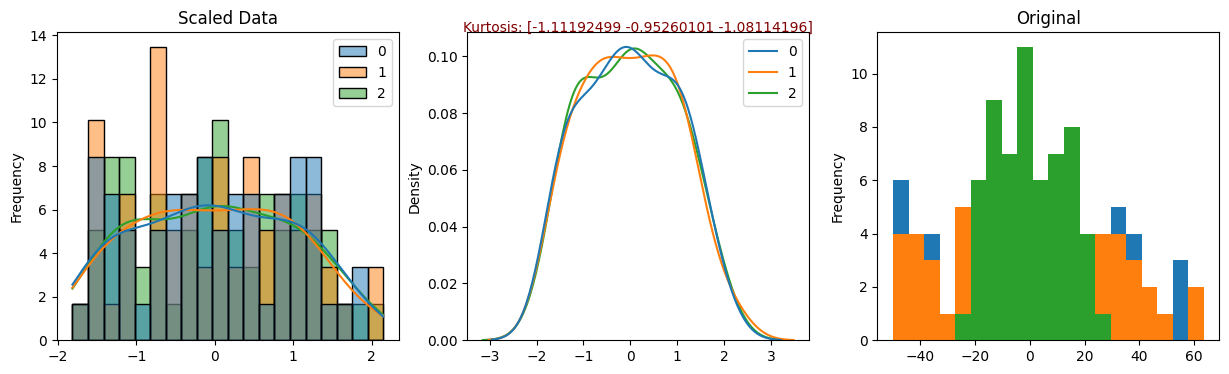

In [147]:
plt.figure(figsize=(15,4)).tight_layout()
ax = plt.subplot(1,3,1)
ax.set_title('Scaled Data')

sns.histplot(scaled_dt, stat='frequency', kde=True, bins=20, ax=ax)
sns.kdeplot(scaled_dt, ax=plt.subplot(1,3,2))
#check if data is normal
plt.annotate(f'Kurtosis: {kurtosis_value}', xy=(0.5, 1), xycoords='axes fraction', ha='center', fontsize=10, color='maroon')

dt.T.plot(kind='hist', bins=20, legend=False, title='Original', ax=plt.subplot(1,3,3))


plt.show()

In [40]:
ica_m = FastICA(n_components=3, random_state=42)
ica_com = ica_m.fit_transform(scaled_dt)

In [43]:
pca_m =PCA(n_components=3,random_state=42)
pca_com = pca_m.fit_transform(scaled_dt)


In [44]:
ica_com.shape , pca_com.shape

((60, 3), (60, 3))

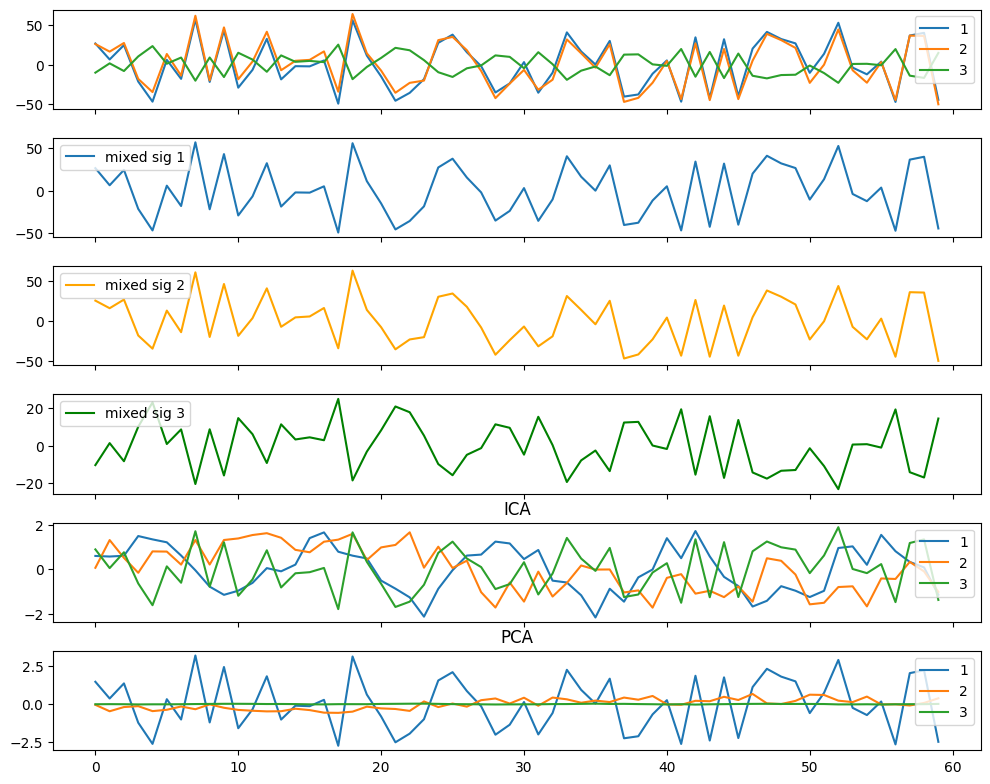

In [87]:
#ALL PLOTS COMBINED
fig, ax = plt.subplots(nrows=6,ncols=1, figsize=(10,8), sharex=True)
fig.tight_layout()
ax[0].plot(dt.T, label=(dt.index +1))
ax[0].legend()

ax[1].plot(dt.loc[0].T, label= 'mixed sig 1')
ax[2].plot(dt.loc[1].T, label= 'mixed sig 2', c='orange')
ax[3].plot(dt.loc[2].T, label= 'mixed sig 3', c='green')
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[4].set_title('ICA')
ax[4].plot(ica_com, label=dt.index+1)
ax[4].legend()

ax[5].set_title('PCA')
ax[5].plot(pca_com, label=dt.index+1)
ax[5].legend()

plt.show()

In [271]:
def plot_trans_sig(com, palette, col):
    for i in range(com.shape[1]):
       sns.lineplot(com[:, i], color=pal[i],ax=ax[i][col], label=f'Component {i+1}')

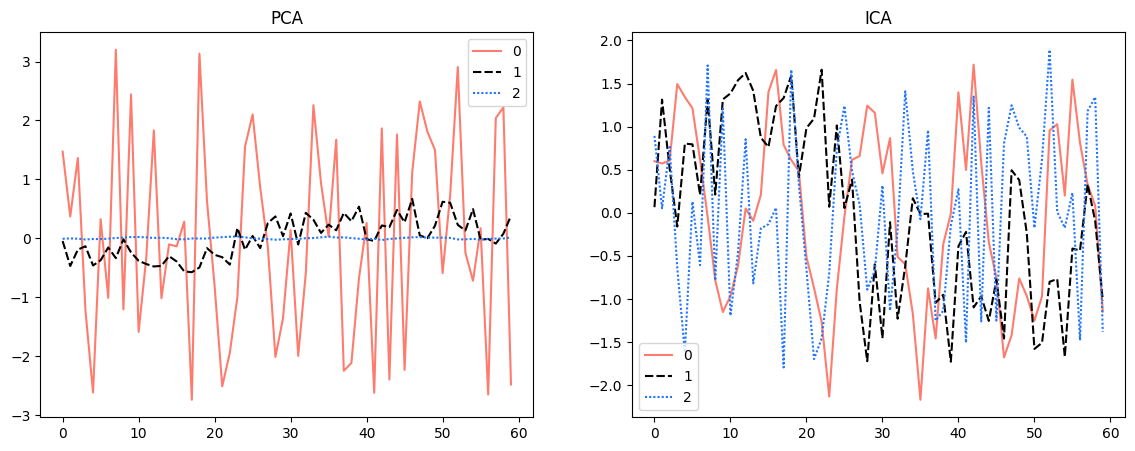

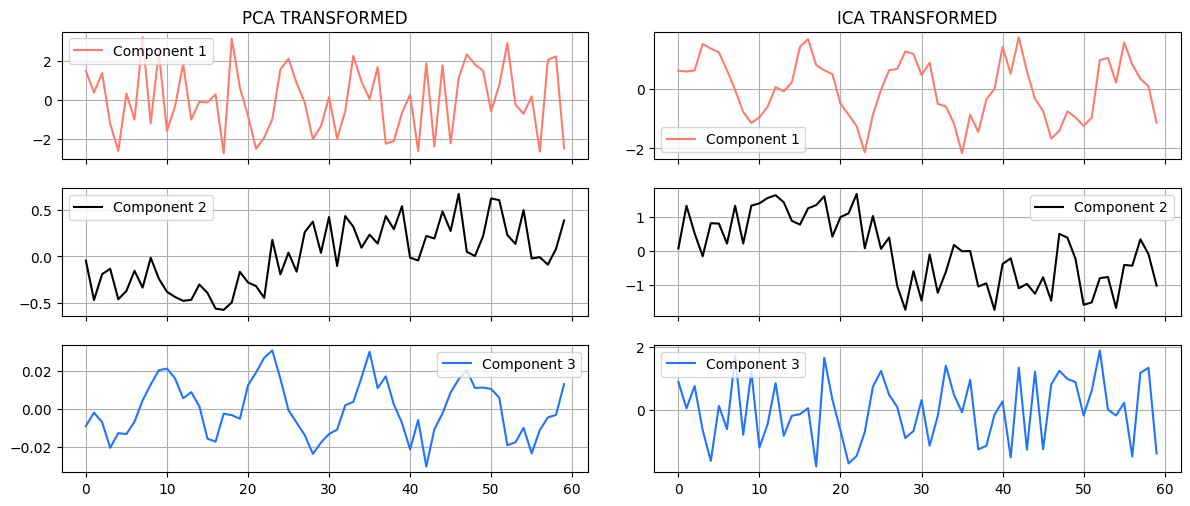

In [123]:
#RESULTS OF PCA AND ICA
pal=sns.crayon_palette(sns.crayons)[8:11]

#ALL THREE TOGETHER 
plt.figure(figsize=(14,5)).tight_layout()
plt.subplot(1,2,1).set_title('PCA')
sns.lineplot(pca_com, ax=plt.subplot(1,2,1), palette=pal)

plt.subplot(1,2,2).set_title('ICA')
sns.lineplot(ica_com, ax=plt.subplot(1,2,2), palette=pal)
plt.show()

#EACH SOURCE SIGNALS
fig, ax = plt.subplots(3,2,sharex=True, figsize=(12,5))
fig.tight_layout()
ax[0][0].set_title('PCA TRANSFORMED')
plot_trans_sig(pca_com, pal, 0)
# sns.lineplot(pca_com[:,0], ax=ax[1][0])
# sns.lineplot(pca_com[:,1], ax=ax[2][0])
# sns.lineplot(pca_com[:,2], ax=ax[3][0])
ax[0][1].set_title('ICA TRANSFORMED')
plot_trans_sig(ica_com, pal, 1)
# sns.lineplot(ica_com[:,0], ax=ax[1][1])
# sns.lineplot(ica_com[:,1], ax=ax[2][1])
# sns.lineplot(ica_com[:,2], ax=ax[3][1])


for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].grid()
        ax[i][j].legend()

plt.show()

In [267]:
sns.crayon_palette(sns.crayons)

[(0.9372549019607843, 0.8705882352941177, 0.803921568627451),
 (0.803921568627451, 0.5843137254901961, 0.4588235294117647),
 (0.9921568627450981, 0.8509803921568627, 0.7098039215686275),
 (0.47058823529411764, 0.8588235294117647, 0.8862745098039215),
 (0.5294117647058824, 0.6627450980392157, 0.4196078431372549),
 (1.0, 0.6431372549019608, 0.4549019607843137),
 (0.9803921568627451, 0.9058823529411765, 0.7098039215686275),
 (0.6235294117647059, 0.5058823529411764, 0.4392156862745098),
 (0.9921568627450981, 0.48627450980392156, 0.43137254901960786),
 (0.0, 0.0, 0.0),
 (0.12156862745098039, 0.4588235294117647, 0.996078431372549),
 (0.6352941176470588, 0.6352941176470588, 0.8156862745098039),
 (0.050980392156862744, 0.596078431372549, 0.7294117647058823),
 (0.45098039215686275, 0.4, 0.7411764705882353),
 (0.8705882352941177, 0.36470588235294116, 0.5137254901960784),
 (0.796078431372549, 0.2549019607843137, 0.32941176470588235),
 (0.7058823529411765, 0.403921568627451, 0.30196078431372547),
 (1.0, 0.4980392156862745, 0.28627450980392155),
 (0.9176470588235294, 0.49411764705882355, 0.36470588235294116),
 (0.6901960784313725, 0.7176470588235294, 0.7764705882352941),
 (1.0, 1.0, 0.6),
 (0.0, 0.8, 0.6),
 (1.0, 0.6666666666666666, 0.8),
 (0.8666666666666667, 0.26666666666666666, 0.5725490196078431),
 (0.11372549019607843, 0.6745098039215687, 0.8392156862745098),
 (0.7372549019607844, 0.36470588235294116, 0.34509803921568627),
 (0.8666666666666667, 0.5803921568627451, 0.4588235294117647),
 (0.6039215686274509, 0.807843137254902, 0.9215686274509803),
 (1.0, 0.7372549019607844, 0.8509803921568627),
 (0.9921568627450981, 0.8588235294117647, 0.42745098039215684),
 (0.16862745098039217, 0.4235294117647059, 0.7686274509803922),
 (0.9372549019607843, 0.803921568627451, 0.7215686274509804),
 (0.43137254901960786, 0.3176470588235294, 0.3764705882352941),
 (0.807843137254902, 1.0, 0.11372549019607843),
 (0.44313725490196076, 0.7372549019607844, 0.47058823529411764),
 (0.42745098039215684, 0.6823529411764706, 0.5058823529411764),
 (0.7647058823529411, 0.39215686274509803, 0.7725490196078432),
 (0.8, 0.4, 0.4),
 (0.9058823529411765, 0.7764705882352941, 0.592156862745098),
 (0.9882352941176471, 0.8509803921568627, 0.4588235294117647),
 (0.6588235294117647, 0.8941176470588236, 0.6274509803921569),
 (0.5843137254901961, 0.5686274509803921, 0.5490196078431373),
 (0.10980392156862745, 0.6745098039215687, 0.47058823529411764),
 (0.9411764705882353, 0.9098039215686274, 0.5686274509803921),
 (1.0, 0.11372549019607843, 0.807843137254902),
 (0.6980392156862745, 0.9254901960784314, 0.36470588235294116),
 (0.36470588235294116, 0.4627450980392157, 0.796078431372549),
 (0.792156862745098, 0.21568627450980393, 0.403921568627451),
 (0.23137254901960785, 0.6901960784313725, 0.5607843137254902),
 (0.996078431372549, 0.996078431372549, 0.13333333333333333),
 (0.9882352941176471, 0.7058823529411765, 0.8352941176470589),
 (1.0, 0.7411764705882353, 0.5333333333333333),
 (0.9647058823529412, 0.39215686274509803, 0.6862745098039216),
 (0.803921568627451, 0.2901960784313726, 0.2980392156862745),
 (0.592156862745098, 0.6039215686274509, 0.6666666666666666),
 (1.0, 0.5098039215686274, 0.2627450980392157),
 (0.7843137254901961, 0.2196078431372549, 0.35294117647058826),
 (0.9372549019607843, 0.596078431372549, 0.6666666666666666),
 (0.9921568627450981, 0.7372549019607844, 0.7058823529411765),
 (0.10196078431372549, 0.2823529411764706, 0.4627450980392157),
 (0.18823529411764706, 0.7294117647058823, 0.5607843137254902),
 (0.09803921568627451, 0.4549019607843137, 0.8235294117647058),
 (1.0, 0.6392156862745098, 0.2627450980392157),
 (0.7294117647058823, 0.7215686274509804, 0.4235294117647059),
 (1.0, 0.4588235294117647, 0.2196078431372549),
 (0.9019607843137255, 0.6588235294117647, 0.8431372549019608),
 (0.2549019607843137, 0.2901960784313726, 0.2980392156862745),
 (1.0, 0.43137254901960786, 0.2901960784313726),
 (0.10980392156862745, 0.6627450980392157, 0.788235294117647),
 (1.0, 0

# HW2 Dimension reduction/ feature representation, and classification
-  1 - 100   Normal (class 1)
- 101-200  Cyclic (class 2)
- 201-300  Upward shift (class 3)

Now, we have 50 samples and 60 features on both training and test sets. => dimension = (50,60)

In [321]:
normal_sig_data = df[:100]
train_normal = normal_sig_data[:50] #first 50 of normal signal data as TRAINING
test = normal_sig_data[50:100] # another rest of normal data -- 50 data as TEST SET 
print(train_normal.shape, test.shape)

(50, 60) (50, 60)


In [498]:
pca_2 = PCA(n_components=5, random_state=42)
pca_train = pca_2.fit_transform(train_normal)

In [499]:
E_c = pca_2.components_
print(pca_2.n_samples_, pca_2.n_components_, pca_2.n_features_in_, pca_2.components_.shape)
E_c

50 5 60 (5, 60)


array([[-0.12099082, -0.00792606, -0.20075939, -0.25751119,  0.04066432,
         0.18284682,  0.01158159,  0.13438257, -0.15140413,  0.05257589,
        -0.08385667,  0.0176654 ,  0.10991422, -0.11841825,  0.06536014,
        -0.03227902,  0.11433435, -0.02679799,  0.07415918, -0.04038543,
        -0.002858  ,  0.08463457, -0.096139  , -0.18197133, -0.16877246,
        -0.01589988,  0.07651433,  0.1255027 , -0.11304966,  0.2317668 ,
         0.1759677 , -0.11779594, -0.05925108,  0.20463599,  0.27285288,
        -0.0088558 ,  0.17780671,  0.27762482,  0.02778206,  0.03996485,
         0.07772985, -0.15200951,  0.0758918 ,  0.08020217,  0.03942602,
         0.00071235,  0.12291531, -0.23152065, -0.0700646 ,  0.11440069,
        -0.05044929,  0.01911429,  0.23714844,  0.21059638, -0.03875632,
         0.03079366,  0.18186031,  0.05853002, -0.12672167,  0.09870099],
       [ 0.11617058, -0.07993231,  0.02272537,  0.05710359, -0.0066953 ,
        -0.04750874,  0.02619423, -0.13434162,  0.

In [500]:
pd.DataFrame(pca_2.explained_variance_ratio_).T

,0,1,2,3,4
0,0.063136,0.060751,0.055704,0.055009,0.050528


'\nit is noticable that the first few components have the high variance which means they carry info about our dataset -- this is to comfirm how PCA work.\n'

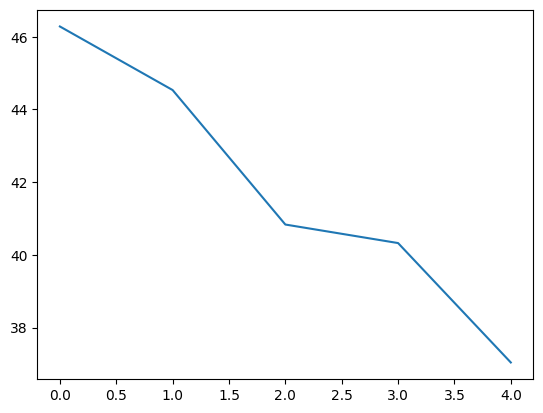

In [501]:
sns.lineplot(pca_2.explained_variance_)
"""
it is noticable that the first few components have the high variance which means they carry info about our dataset -- this is to comfirm how PCA work.
"""

### FOR ANOMALY DETECTION
***for reference and more understanding*** : https://github.com/jeffprosise/Machine-Learning/blob/master/Anomaly%20Detection%20(PCA).ipynb 
- either follow this the code above or,
- follow your professor guide -- they both work the same way, just that your prof.'s way is to compute it by hand.



In [504]:
pca_test = pd.DataFrame(pca_2.transform(test))
pca_train = pd.DataFrame(pca_train)
pca_df = pd.concat([pca_train, pca_test]).reset_index().drop(columns={'index'})
pca_df_reconstructed = pca_2.inverse_transform(pca_df)
pca_df_reconstructed
pca_df

,0,1,2,3,4
0,-0.201948,0.863354,15.101319,6.107498,-5.013910
1,-6.745837,-7.063131,-7.137479,-2.628644,-7.215140
2,-3.363112,-2.299420,-4.167903,5.925649,-3.458135
3,-4.768205,-9.903690,1.313372,-1.087537,12.013556
4,6.363704,-8.867158,-6.962264,2.566935,-1.610112
...,...,...,...,...,...
95,-0.319254,6.100630,-0.684685,-1.058212,4.023225
96,-3.871765,-4.493705,6.179280,-10.678540,-1.826420
97,-5.666155,-7.345963,-7.779859,1.039329,-4.762667
98,-4.899606,-1.100210,0.842833,-0.726392,0.588961


In [506]:
# def compute_distance(reconstructed, origdf):
#     dist_df = pd.DataFrame()
#     for i in range(reconstructed.shape[0]):
#         distance = np.abs(np.array(reconstructed)[i] -  np.mean(np.array(origdf), axis=1)[i])
#         dist_df= pd.concat([dist_df, pd.DataFrame(distance).T])#absolute mean deviation
#     return dist_df.reset_index().drop(columns='index')
loss = np.mean(np.absolute(np.array(pca_df_reconstructed) - np.array(normal_sig_data)), axis=1)
pd.DataFrame(loss)
pd.DataFrame(np.absolute(np.array(pca_df_reconstructed) - np.array(normal_sig_data)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.759058,3.764281,0.579798,3.186461,0.936775,2.192312,4.372386,0.604118,5.139235,4.375944,2.126705,2.896133,2.734844,2.949313,3.463927,0.742699,3.454993,1.624861,1.202904,1.076378,2.178427,0.043374,0.268638,0.919361,1.527585,2.853627,2.350735,2.922069,2.830251,4.141100,0.907812,0.185214,3.362779,3.588271,0.470725,2.056735,3.927419,1.937151,0.018438,0.364505,4.340201,2.702248,0.064846,4.373273,0.550442,0.363806,0.776865,1.982138,3.359482,3.113429,1.011591,0.205669,1.656681,7.307414,4.324557,0.508668,3.539573,1.236767,4.348099,0.276845
1,4.828378,5.108836,2.554419,1.069152,1.625547,1.676002,2.046028,1.104234,1.491790,0.108727,2.672269,4.360955,1.524931,0.747601,0.622810,4.168945,0.253495,2.727876,2.352425,0.151406,2.553224,2.644086,4.977699,3.908728,2.800810,2.732951,3.092799,1.163654,1.369776,3.483121,2.018517,1.023549,0.610595,0.104405,0.805386,0.655024,4.944366,3.861004,0.689822,3.546378,5.112396,6.740108,3.711258,4.506981,2.943440,0.619959,3.548235,1.045003,1.597062,0.728049,0.989891,2.001411,0.261505,1.001054,0.876492,2.975307,1.951882,3.050880,2.223001,2.307586
2,0.744895,0.701565,3.574152,4.716438,0.224303,0.720082,4.799482,0.242299,3.158764,3.266212,1.844488,1.617997,2.564448,5.059505,6.189256,5.285721,2.538105,2.635497,0.069418,4.415691,1.545252,2.395989,3.227266,0.675458,4.568091,0.124005,0.760662,2.137157,1.250302,1.002976,3.376889,5.487608,2.641050,2.213299,3.044476,5.757486,1.880478,4.944080,2.070585,4.357663,2.014216,0.894914,1.490860,1.696143,1.175178,2.103099,0.097335,7.538863,4.395790,0.300353,2.206705,3.130969,2.607419,4.225134,5.340557,1.761042,2.110504,3.023287,2.323486,0.342864
3,4.987927,1.099634,1.684499,5.921642,2.467095,3.451254,0.974937,2.579614,0.947153,4.330505,2.703399,0.768550,1.941676,1.522452,2.059806,3.349365,2.757428,3.075719,4.154036,2.141629,0.351742,3.537163,1.966031,1.104110,1.170849,4.686566,1.849200,1.773515,1.535413,3.107139,2.265113,1.992328,1.614167,1.832410,4.214472,0.180322,3.228095,0.381734,2.560572,2.754513,4.358248,1.672279,0.946222,1.645531,2.961915,0.117130,2.451237,0.236236,0.270945,0.026076,4.131872,2.655508,0.311768,2.158036,0.823256,0.374627,3.135236,4.197552,0.318622,2.527133
4,1.870639,2.305819,5.533907,1.516459,4.391968,1.227652,6.184350,0.294583,2.057950,2.209320,0.407369,2.005487,3.652212,5.328803,4.597645,1.179973,4.248085,0.755323,1.969036,3.681035,0.799046,2.774737,4.870988,1.255848,1.214655,3.109080,2.894812,1.874324,5.443208,3.610653,1.155924,3.991612,1.426457,1.309177,2.334867,1.269795,5.808500,2.869827,4.038728,1.241254,0.203329,1.275385,5.364451,4.424067,2.835721,1.275015,3.271122,1.723373,2.132352,4.464838,3.169893,2.690072,6.817112,2.090095,2.720247,1.649041,2.561557,1.689798,0.278860,1.357616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.070125,3.135378,1.960572,5.569780,1.512827,3.630180,5.604026,2.381778,1.897922,5.315986,1.900938,5.080726,4.044658,0.008466,5.700315,5.855031,2.489869,1.533796,3.200836,3.815220,5.436327,3.255307,1.479859,2.231080,4.078622,1.371128,5.184724,0.997991,0.230838,1.937610,1.332584,4.038902,1.491208,0.966074,2.821577,3.320160,5.009825,2.605538,2.004049,0.162497,1.566503,3.368113,4.872851,3.023392,1.790038,5.647712,5.418909,1.463815,1.967591,5.426946,1.211876,3.584711,1.553491,4.217283,4.064912,5.475216,2.607732,1.162173,0.019870,0.982516
96,1.373065,0.180114,7.010027,1.633696,1.208246,1.350625,0.676095,2.669278,4.296546,1.347011,2.213848,2.387604,5.155860,1.487490,0.059314,4.392322,2.800758,0.700088,4.011068,3.987392,0.406987,6.844203,4.537432,3.168756,0.423429,2.586002,0.960214,0.487105,2.927843,6.388542,4.133359,5.263757,5.717111,5.795162,4.408031,0.264515,0.558

In [473]:
# for id in range(pca_df_reconstructed.shape[0]):
#     distance = np.mean(np.abs(np.array(pca_df_reconstructed)[id] -  np.mean(normal_sig_data, axis=1)[id]))
# # dist_df = pd.DataFrame(distance)

0.9482321616161004

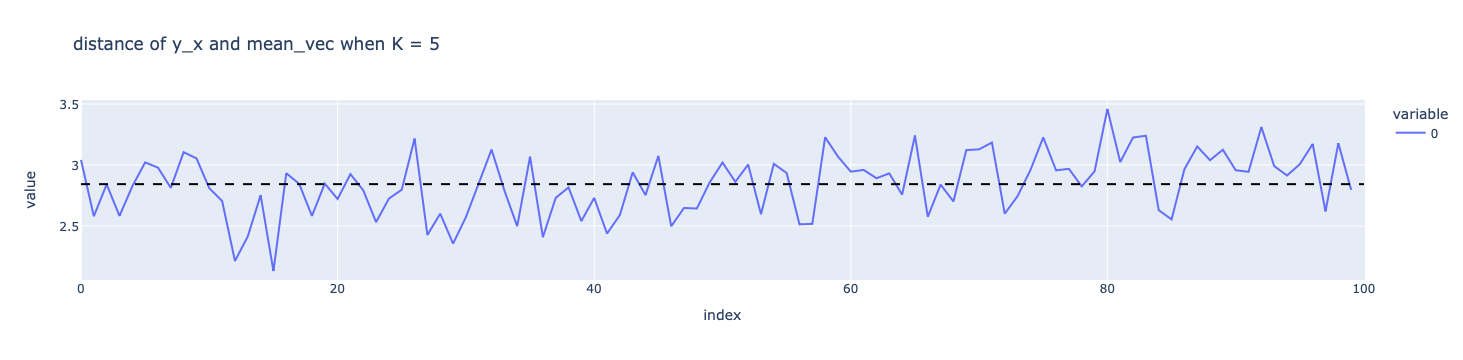

In [497]:
import plotly.express as px
# import plotly.graph_objects as go

px.line(loss, title='distance of y_x and mean_vec when K = 5').add_shape(
    dict(
        type='line',
        x0=0,
        x1=np.max(loss.shape),
        y0= np.mean(loss),
        y1=np.mean(loss),
        line=dict(color='black', width=2, dash ='dash')
    )
)


Index([50, 58, 59, 65, 69, 71, 75, 80, 82, 83, 87, 88, 89, 98], dtype='int64')

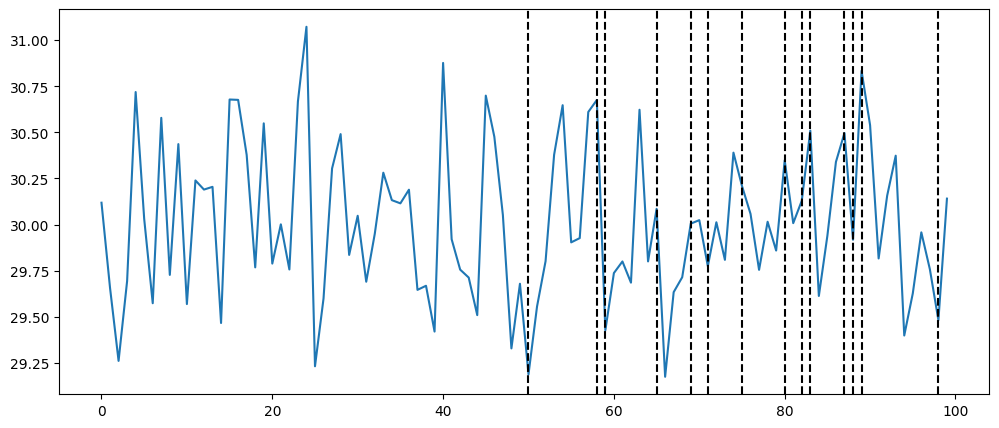

In [529]:
# def find_anomalies(redf,df, threshold):
#     # for i in df.index:
#     #     print(i)
#     # compute_distance(redf,df)
#     return  compute_distance(redf,df) > threshold
    
# def anomalies_plot(redf,df, thres):
#     plt.plot(df)
#     for i in range(10):
#         if find_anomalies(redf, df, thres):
#             plt.avline(find_anomalies(redf, df, thres).idex)
#     plt.show()
plt.figure(figsize=(12,5))
plt.plot(np.mean(normal_sig_data, axis=1))
for ai in normal_sig_data.loc[loss>3].index:
    plt.axvline(ai, color='black', ls='--')
# normal_sig_data.loc[loss>3].index
normal_sig_data.loc[loss>3].index

In [427]:
# anomalies_plot(pca_df_reconstructed, normal_sig_data, 1.5)
find_anomalies(pca_df_reconstructed, normal_sig_data,1.5).shape
# normal_sig_data.loc[an]


(60,)

### BY HAND

***HW instruction*** (compute by hand)
- let $y^-_normal$  be the mean vector of normal training samples. The anomaly is detected as follows:
Compute the distance for a test sample: 
- Compute the distance  delta $y_x = abs(y_x - y^-_normal)$ for a test sample x  


In [218]:
# K = 5 #number of components
def feature_vec(test, K):
    y_x = []
    for i in test.index:
        y_test = E_c[:K] @ np.array(test.loc[i])
        # y_x = np.append(y_x, y_test)
        y_x.append(y_test)
    y_x = np.array(y_x)
    del_y = np.abs(y_x - pca_2.mean_[:K])
    feature_mean = np.mean(del_y, axis=0)
    return y_x, del_y, feature_mean
        
# mean_norm = pca_2.mean_
# del_y = np.abs(y_x_5 - mean_norm[:K])
# y_x_5, del_y_5, fm5 = feature_vec(test, 5)
# y_x_5.shape, del_y_5.shape

In [265]:
def detect_anomaly(del_y, thres):
    data = pd.DataFrame(del_y)
    df = data > thres
    return df.sum(axis = 1) > 0.5*data.shape[1]
    
def plot_anomaly(del_y, fmean):
    pd.DataFrame(del_y).plot(title = 'Highligh the anomaly')
    for index, row in pd.DataFrame(del_y).iterrows():
        if detect_anomaly(del_y, fmean)[index]:
            plt.axvline(index, color='grey', alpha=0.2)     
    
def plot_anomaly_all(test, k):
    y_x, del_y, fmean = feature_vec(test, k)
    sns.lineplot(pd.DataFrame(del_y), legend=False)
    # pd.DataFrame(del_y).plot(title = 'Highligh the anomaly')
    for index, row in pd.DataFrame(del_y).iterrows():
        if detect_anomaly(del_y, fmean)[index]:
            plt.axvline(index, color='grey', alpha=0.2)  
    # plt.tight_layout()
    plt.title('Highlited Anomaly')
    plt.show()
    anomaly = np.array(detect_anomaly(del_y, fmean).loc[detect_anomaly(del_y, fmean)==True].index+1)
    print(f'anomaly:{len(anomaly)} samples,', anomaly)

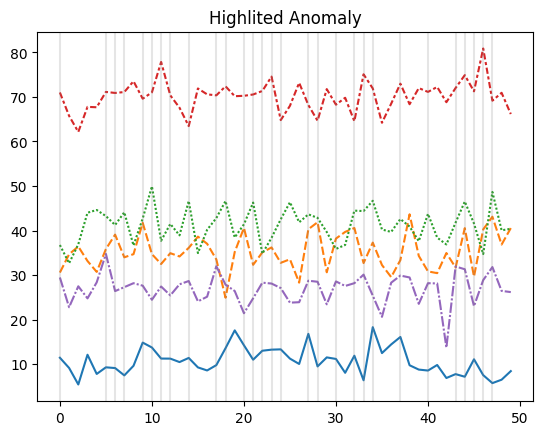

anomaly:29 samples, [ 1  6  7  8 10 11 12 13 15 18 19 21 22 23 24 25 28 29 31 33 34 35 38 41
 44 45 46 47 48]


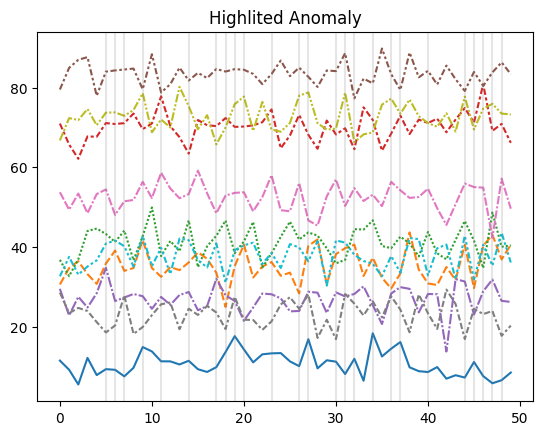

anomaly:25 samples, [ 6  7  8 10 12 15 18 19 20 21 24 27 28 31 32 33 35 37 38 41 45 46 47 48
 49]


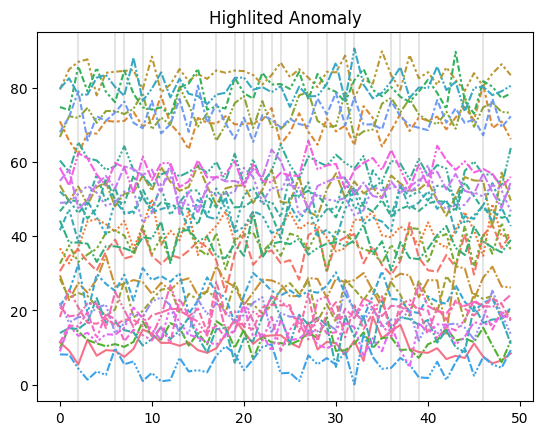

anomaly:21 samples, [ 3  7  8 10 12 14 18 20 21 22 23 24 25 28 30 32 33 37 38 40 47]


In [266]:
plot_anomaly_all(test, 5)
plot_anomaly_all(test, 10)
plot_anomaly_all(test, 30)

### Remove first component
*for more understanding:* https://machinelearningmastery.com/principal-component-analysis-for-visualization/
- X - 1st PC -- as thogh the first component as u know it captures the most variation of data, i.e. it contains the feature that hv the most info. about the data. Doing this to see and compare how the model will perform with and without it.